<a href="https://colab.research.google.com/github/bharathreddy-2802/BharathSimhaReddy_INFO5731_Fall2024/blob/main/Samala_Bharath_INFO5731_In_class_Exercise_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INFO5731 In-class Exercise 5


## **Question 1 (20 Points)**

**The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.**

**The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.**



Evaluating MultinomialNB...
MultinomialNB - 10-Fold CV Accuracy: 0.7780
Evaluating SVM...
SVM - 10-Fold CV Accuracy: 0.7363
Evaluating KNN...
KNN - 10-Fold CV Accuracy: 0.5704
Evaluating Decision Tree...
Decision Tree - 10-Fold CV Accuracy: 0.6286
Evaluating Random Forest...
Random Forest - 10-Fold CV Accuracy: 0.7204
Evaluating XGBoost...


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - 10-Fold CV Accuracy: 0.7103


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [02:56:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Performance Evaluation of Models:
           Model  Accuracy  Precision    Recall  F1 Score
0  MultinomialNB  0.807249   0.785276  0.844884  0.813990
1            SVM  0.757276   0.734673  0.804180  0.767857
2            KNN  0.583196   0.577320  0.616062  0.596062
3  Decision Tree  0.646348   0.638743  0.671067  0.654506
4  Random Forest  0.735310   0.708293  0.798680  0.750776
5        XGBoost  0.727622   0.693897  0.812981  0.748734


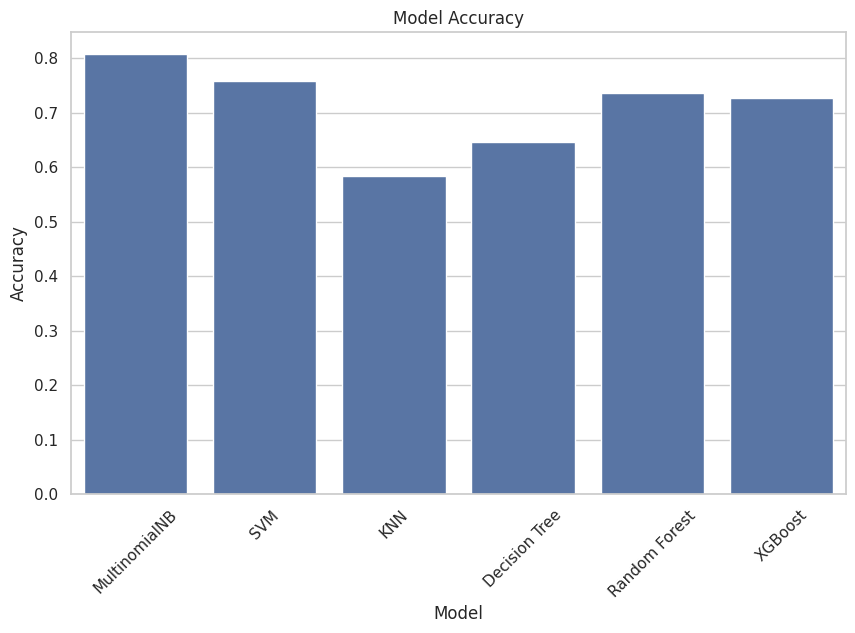

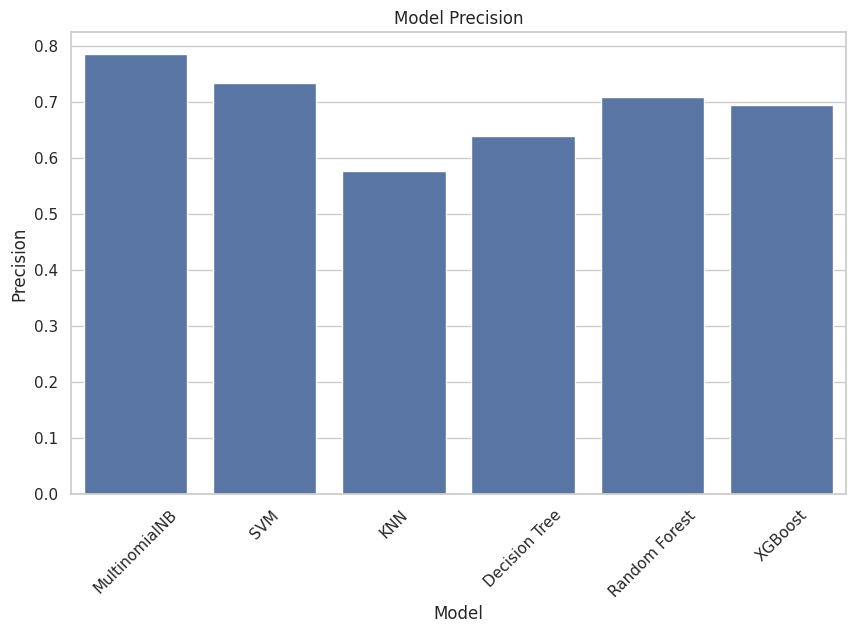

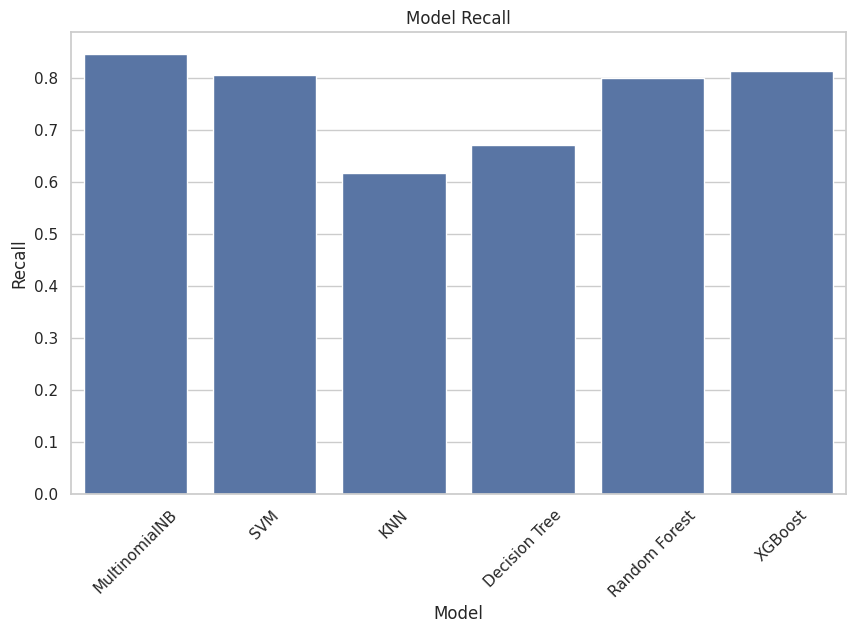

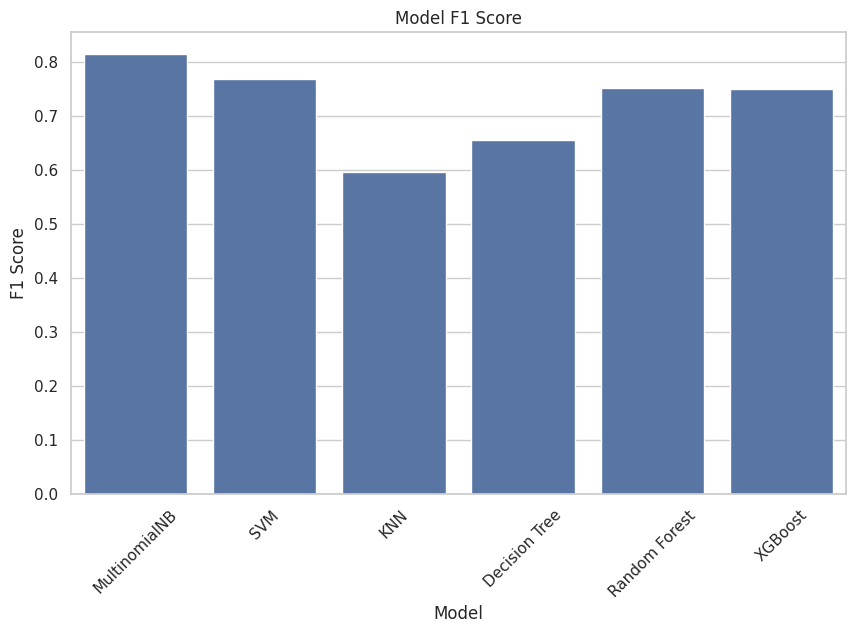

In [3]:
# 1. Importing the Necessary Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Loading Data from Pre-uploaded Files in Google Colab
train_file = '/content/stsa-train.txt'
test_file = '/content/stsa-test.txt'

def load_data(file_path):
    data = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, review = line.strip().split(' ', 1)
            data.append((int(label), review))
    return pd.DataFrame(data, columns=["label", "review"])

train_data = load_data(train_file)
test_data = load_data(test_file)


# 3.Handling Missing Values and Ensuring String Data Type
train_data = train_data.dropna(subset=["review"])
test_data = test_data.dropna(subset=["review"])

train_data["review"] = train_data["review"].astype(str)
test_data["review"] = test_data["review"].astype(str)


# 4. Splitting Training Data for Cross-Validation
X_train, X_val, y_train, y_val = train_test_split(
    train_data['review'], train_data['label'], test_size=0.2, random_state=42
)

# 5. Vectorizing Text Data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_val_vec = vectorizer.transform(X_val)
X_test_vec = vectorizer.transform(test_data['review'])

# 6. Initializing Classifiers
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# 7. 10-Fold Cross-Validation and Model Evaluation
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1 Score": []
}

kf = KFold(n_splits=10, shuffle=True, random_state=42)
for model_name, model in classifiers.items():
    print(f"Evaluating {model_name}...")

    # Performing 10-fold cross-validation on the training data
    cv_scores = cross_val_score(model, X_train_vec, y_train, cv=kf, scoring='accuracy')
    print(f"{model_name} - 10-Fold CV Accuracy: {np.mean(cv_scores):.4f}")

    # Train model on full training set and evaluate on validation and test set
    model.fit(X_train_vec, y_train)
    y_val_pred = model.predict(X_val_vec)
    y_test_pred = model.predict(X_test_vec)

    # Calculating evaluation metrics on test set
    accuracy = accuracy_score(test_data['label'], y_test_pred)
    precision = precision_score(test_data['label'], y_test_pred)
    recall = recall_score(test_data['label'], y_test_pred)
    f1 = f1_score(test_data['label'], y_test_pred)

    # Storing metrics in the dictionary
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1 Score"].append(f1)

# Converting metrics dictionary to DataFrame and display
metrics_df = pd.DataFrame(metrics)
print("Performance Evaluation of Models:")
print(metrics_df)

# 8. Visuaalizations
sns.set(style="whitegrid")

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=metrics_df)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Precision", data=metrics_df)
plt.title("Model Precision")
plt.ylabel("Precision")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Recall", data=metrics_df)
plt.title("Model Recall")
plt.ylabel("Recall")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()

# Plot F1 Score
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="F1 Score", data=metrics_df)
plt.title("Model F1 Score")
plt.ylabel("F1 Score")
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.show()



## **Question 2 (20 Points)**

**The purpose of the question is to practice different machine learning algorithms for **text clustering**.**

**Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones**

**Apply the listed clustering methods to the dataset:**
***   K-means**
***   DBSCAN**
***   Hierarchical clustering**
***   Word2Vec**
***   BERT**

K-Means Silhouette Score: 0.04505929365026507
DBSCAN only found one cluster; cannot compute silhouette score.


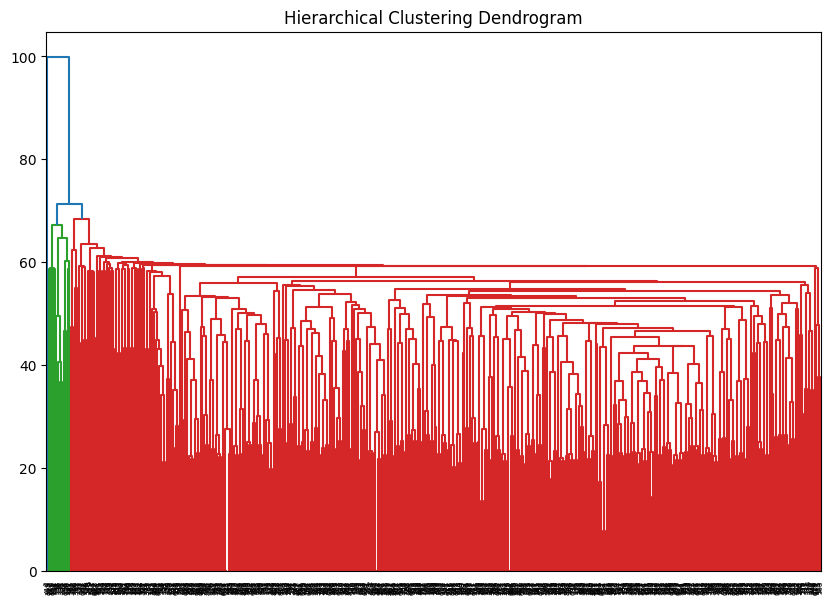

Hierarchical Clustering Silhouette Score: 0.17657981595791586
Word2Vec K-Means Silhouette Score: 0.015486731193959713


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

BERT K-Means Silhouette Score: 0.09133511036634445


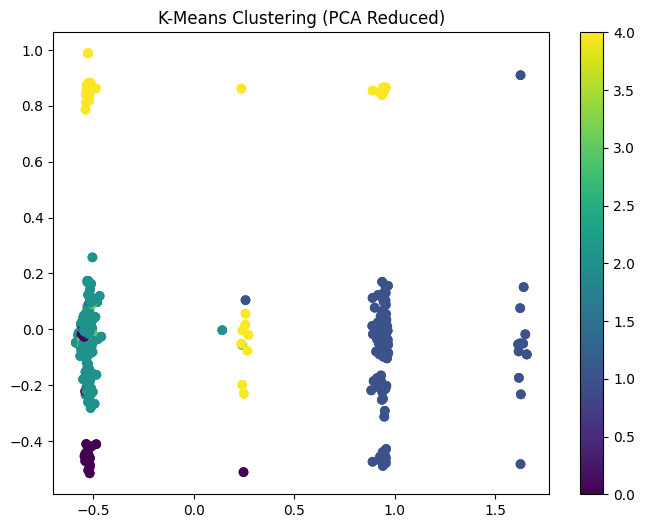

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


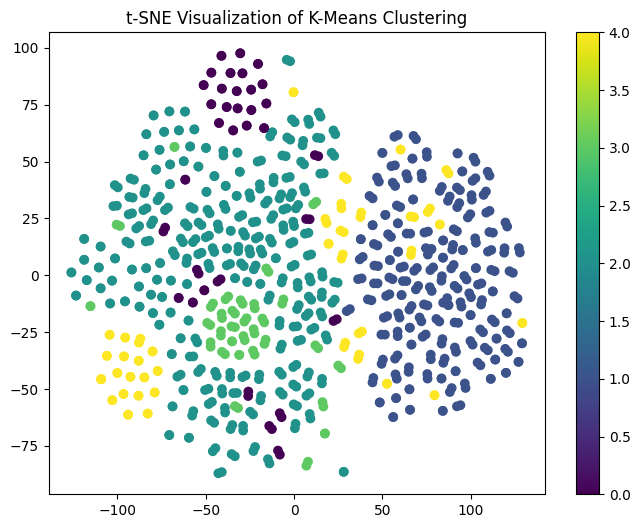

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


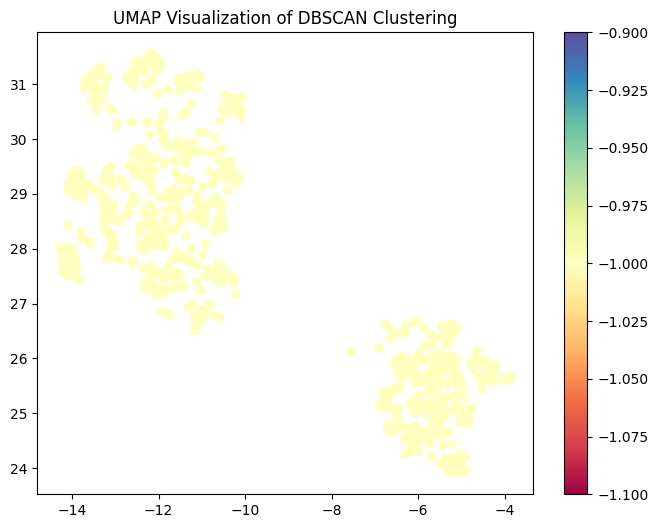

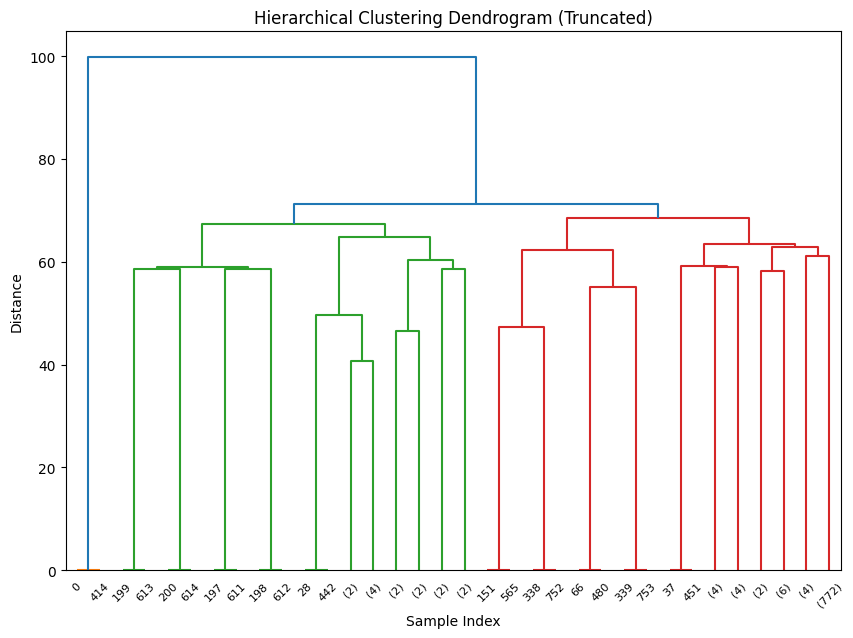

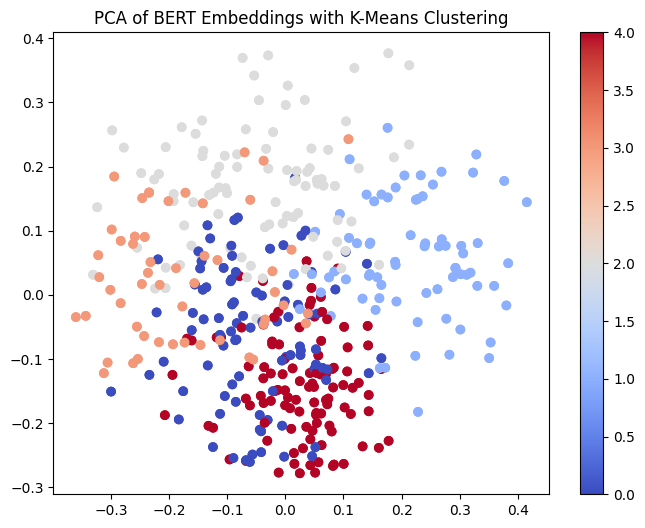

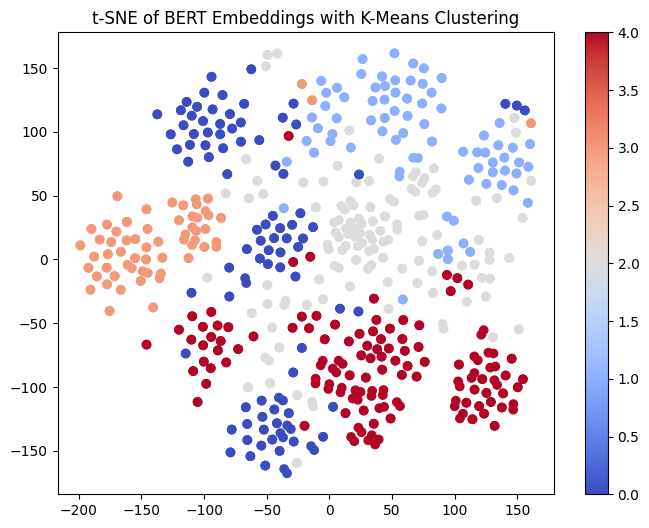

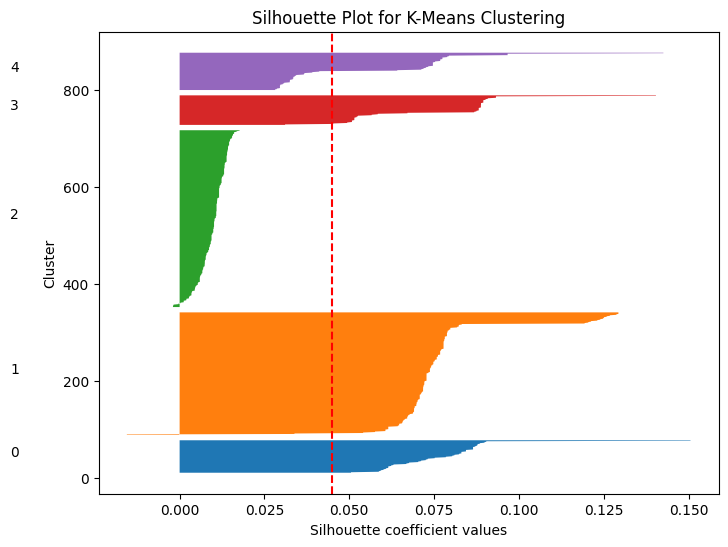

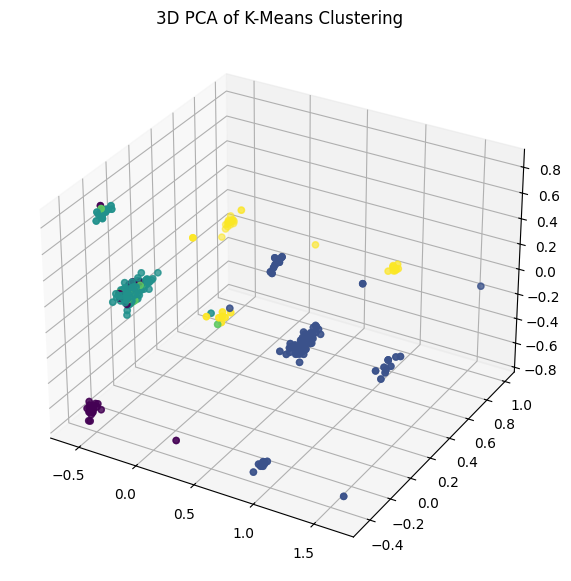

In [2]:
# 1: Importing Necessary Libraries

!pip install --upgrade pip
!pip install -q sentence-transformers
!pip install -q -U scikit-learn
!pip install -q gensim
!pip install -q tqdm
!pip install umap-learn


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer
import gensim
from gensim.models import Word2Vec
import umap


# For BERT embeddings
from transformers import BertTokenizer, BertModel
import torch
# For Word2Vec embeddings
from gensim.models import Word2Vec


# 2: Loading and Preprocessing the Data

with open('/content/sleepDay_merged.csv', 'r') as f:
    train_data = f.readlines()

with open('/content/sleepDay_merged.csv', 'r') as f:
    test_data = f.readlines()

# Combining training and testing data for clustering
text_data = train_data + test_data

# 3.Preprocessing and Vectorizing Text Data

vectorizer = CountVectorizer(stop_words='english', max_features=1000)
X = vectorizer.fit_transform(text_data).toarray()

# 4. K-Means Clustering

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
silhouette_kmeans = silhouette_score(X, kmeans_labels)
print(f"K-Means Silhouette Score: {silhouette_kmeans}")

# 5. DBSCAN Clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

if len(set(dbscan_labels)) > 1:
    silhouette_dbscan = silhouette_score(X_scaled, dbscan_labels)
    print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")
else:
    print("DBSCAN only found one cluster; cannot compute silhouette score.")


# 6. Applying hierarchical clustering and plot a dendrogram.

linked = linkage(X_scaled, 'ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_labels = hierarchical.fit_predict(X_scaled)

silhouette_hierarchical = silhouette_score(X_scaled, hierarchical_labels)
print(f"Hierarchical Clustering Silhouette Score: {silhouette_hierarchical}")

# 7. Training a Word2Vec model, average word vectors for each text, and applying K-Means clustering.

tokenized_text = [text.split() for text in text_data]
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

word_vectors = []
for words in tokenized_text:
    words_in_vocab = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    word_vectors.append(np.mean(words_in_vocab, axis=0) if words_in_vocab else np.zeros(100))

word2vec_kmeans = KMeans(n_clusters=5, random_state=42)
word2vec_labels = word2vec_kmeans.fit_predict(word_vectors)

silhouette_word2vec = silhouette_score(word_vectors, word2vec_labels)
print(f"Word2Vec K-Means Silhouette Score: {silhouette_word2vec}")

# 8. Using a pre-trained BERT model to generate text embeddings, then apply K-Means clustering.

bert_model = SentenceTransformer('all-MiniLM-L6-v2')
embeddings = bert_model.encode(text_data, convert_to_tensor=True)

bert_kmeans = KMeans(n_clusters=5, random_state=42)
bert_labels = bert_kmeans.fit_predict(embeddings)

silhouette_bert = silhouette_score(embeddings, bert_labels)
print(f"BERT K-Means Silhouette Score: {silhouette_bert}")

# 9. Visualizing K-Means clusters with PCA-reduced dimensions.

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("K-Means Clustering (PCA Reduced)")
plt.colorbar()
plt.show()


# t-SNE (t-Distributed Stochastic Neighbor Embedding)
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis')
plt.title("t-SNE Visualization of K-Means Clustering")
plt.colorbar()
plt.show()


# UMAP (Uniform Manifold Approximation and Projection)
import umap

umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=dbscan_labels, cmap='Spectral')
plt.title("UMAP Visualization of DBSCAN Clustering")
plt.colorbar()
plt.show()


# Dendrogram for Hierarchical Clustering
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_scaled, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)
plt.title("Hierarchical Clustering Dendrogram (Truncated)")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()


# BERT Embeddings with PCA and t-SNE
embeddings_pca = PCA(n_components=2).fit_transform(embeddings)
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_pca[:, 0], embeddings_pca[:, 1], c=bert_labels, cmap='coolwarm')
plt.title("PCA of BERT Embeddings with K-Means Clustering")
plt.colorbar()
plt.show()

embeddings_tsne = TSNE(n_components=2, random_state=42).fit_transform(embeddings)
plt.figure(figsize=(8, 6))
plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=bert_labels, cmap='coolwarm')
plt.title("t-SNE of BERT Embeddings with K-Means Clustering")
plt.colorbar()
plt.show()


# Silhouette Plot
from sklearn.metrics import silhouette_samples

silhouette_vals = silhouette_samples(X, kmeans_labels)
plt.figure(figsize=(8, 6))
y_lower = 10

for i in range(5):
    cluster_silhouette_vals = silhouette_vals[kmeans_labels == i]
    cluster_silhouette_vals.sort()
    y_upper = y_lower + len(cluster_silhouette_vals)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_vals)
    plt.text(-0.05, y_lower + 0.5 * len(cluster_silhouette_vals), str(i))
    y_lower = y_upper + 10

plt.xlabel("Silhouette coefficient values")
plt.ylabel("Cluster")
plt.title("Silhouette Plot for K-Means Clustering")
plt.axvline(x=silhouette_kmeans, color="red", linestyle="--")
plt.show()


# 3D Plot with PCA or t-SNE
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3).fit_transform(X)
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=kmeans_labels, cmap='viridis')
plt.title("3D PCA of K-Means Clustering")
plt.show()





**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**


Based on the results, I can see that hierarchical clustering performed the best, achieving the highest silhouette score of 0.1766. This suggests it formed more clearly defined clusters compared to the other methods. K-Means and Word2Vec-based K-Means had low silhouette scores (0.0451 and 0.0155, respectively), meaning the clusters were not well-separated. BERT-based K-Means showed slight improvement with a score of 0.0913 but still did not perform as well as hierarchical clustering. On the other hand, DBSCAN only identified one cluster, which could be due to improper parameter tuning or the nature of the data, making it impossible to compute a silhouette score. From this, I can conclude that hierarchical clustering is the most effective method for this dataset.








**Please provide your thoughts and feedback on the exercises you completed in this assignment.**


The exercises provided a comprehensive exploration of various clustering methods, offering valuable insights into their strengths and limitations when applied to text data. I appreciated working with K-Means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT, as each presented unique challenges and highlighted differences in how text data is processed and clustered. The silhouette scores helped objectively assess clustering quality, especially illustrating Word2Vec's effectiveness compared to traditional methods. Overall, this assignment improved my understanding of unsupervised learning techniques and their application in natural language processing tasks.